# Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Understanding Data

In [4]:
train_df = pd.read_csv('train data.csv')
test_df = pd.read_csv('test data.csv')
y_test_df = pd.read_csv('gender_submission.csv')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [11]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [12]:
test_df.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


- Evaluating null values

In [13]:
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [14]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

In [15]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace = True)

Column 'Cabin' does not affect our model so we do not that column

In [16]:
train_df = train_df.drop('Cabin', axis = 1)
test_df = test_df.drop('Cabin', axis = 1)

Also name of the passenger and ID do not affect he/she dies or survive. That's why we can remove this columns too

In [17]:
train_df = train_df.drop('Name', axis = 1)
train_df = train_df.drop('PassengerId', axis = 1)
test_df = test_df.drop('Name', axis = 1)
test_df = test_df.drop('PassengerId', axis = 1)
train_df.drop_duplicates(inplace=True)

In [49]:
y_test_df = y_test_df.drop('PassengerId', axis = 1)

In [18]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [19]:
test_df.head(3)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,34.5,0,0,330911,7.8292,Q
1,3,female,47.0,1,0,363272,7.0000,S
2,2,male,62.0,0,0,240276,9.6875,Q


In [20]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [21]:
train_df['Pclass'].unique()

array([3, 1, 2])

# Data Visulation

In [22]:
plt.figure(figsize = (12, 8))
plt.style.use('ggplot')

<Figure size 1200x800 with 0 Axes>

- Passenger Classes

([<matplotlib.patches.Wedge at 0x7cb4fa1db5e0>,
 [Text(0.7882191379949322, 0.7672747816125108, '1st Class'),
  Text(-0.6449652050426508, 0.8910779339004483, '2nd Class'),
  Text(-0.15938887747649272, -1.0883910996221826, '3rd Class')],
 [Text(0.4299377116335993, 0.4185135172431877, '24.57%'),
  Text(-0.3517992027505368, 0.48604250940024446, '20.80%'),
  Text(-0.08693938771445058, -0.5936678725211905, '54.63%')])

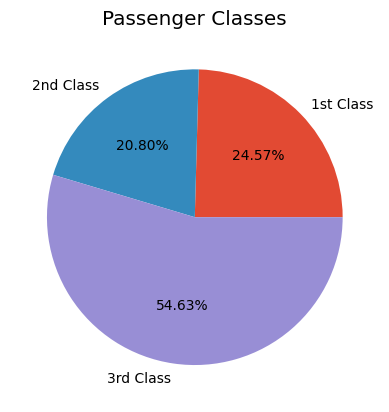

In [23]:
class_1 = train_df['Pclass'].value_counts()[1]
class_2 = train_df['Pclass'].value_counts()[2]
class_3 = train_df['Pclass'].value_counts()[3]

labels = ['1st Class', '2nd Class', '3rd Class']
values = [class_1, class_2, class_3]
plt.title('Passenger Classes')
plt.pie(values, labels = labels, autopct = '%1.2f%%')

- Port of Embarkation

([<matplotlib.patches.Wedge at 0x7cb4fa0c29e0>,
 [Text(-0.7132659597980986, 0.8374077087018589, 'Cherbourg'),
  Text(0.4611979505838932, -0.9986473103039016, 'Queenstown'),
  Text(1.059301567520189, -0.29644592938556413, 'Southampton')],
 [Text(-0.38905415988987196, 0.45676784111010477, '72.46%'),
  Text(0.2515625185003053, -0.544716714711219, '18.86%'),
  Text(0.5778008550110121, -0.16169777966485313, '8.69%')])

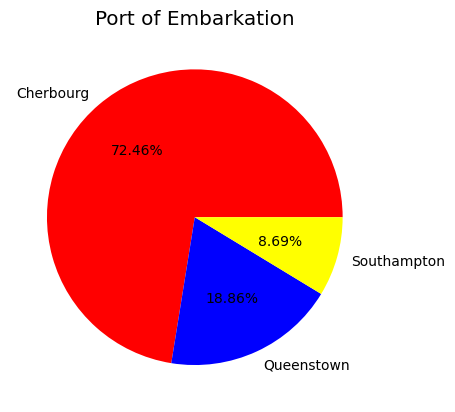

In [24]:
s = train_df['Embarked'].value_counts()['S']
c = train_df['Embarked'].value_counts()['C']
q = train_df['Embarked'].value_counts()['Q']

labels = ['Cherbourg', 'Queenstown', 'Southampton']
values = [s, c, q]
colors = ['red', 'blue', 'yellow']
plt.title('Port of Embarkation')

plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

It is clear to say that most of passengers embark the Titanic from Cherbourg Port

([<matplotlib.patches.Wedge at 0x7cb4fa122080>,
 [Text(-0.49674852892150084, 0.9814483679818949, 'Male'),
  Text(0.4967485289215011, -0.9814483679818947, 'Female')],
 [Text(-0.27095374304809133, 0.5353354734446699, '64.91%'),
  Text(0.2709537430480915, -0.5353354734446698, '35.09%')])

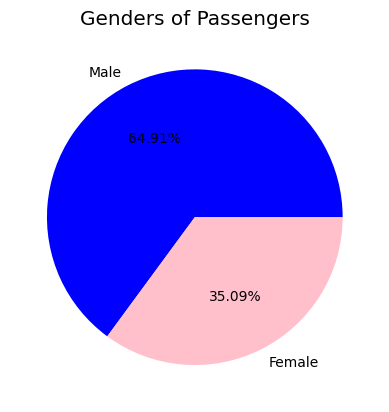

In [25]:
male = train_df['Sex'].value_counts()['male']
female = train_df['Sex'].value_counts()['female']

colors = ['blue', 'pink']
labels = ['Male', 'Female']
values = [male, female]
plt.title('Genders of Passengers')

plt.pie(values, labels = labels, colors = colors, autopct = '%1.2f%%')

- Age

<Axes: xlabel='Age', ylabel='Density'>

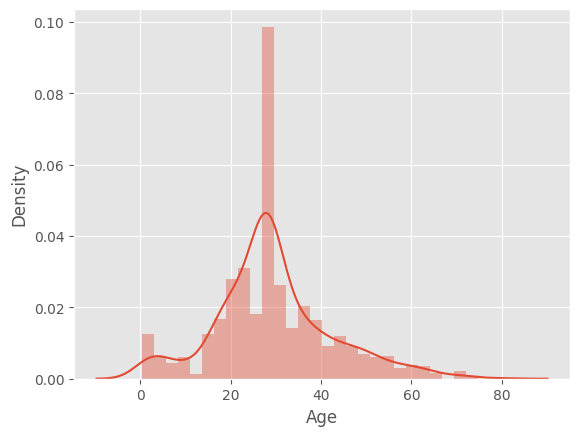

In [26]:
sns.distplot(train_df['Age'])

- Fare

<Axes: xlabel='Fare', ylabel='Density'>

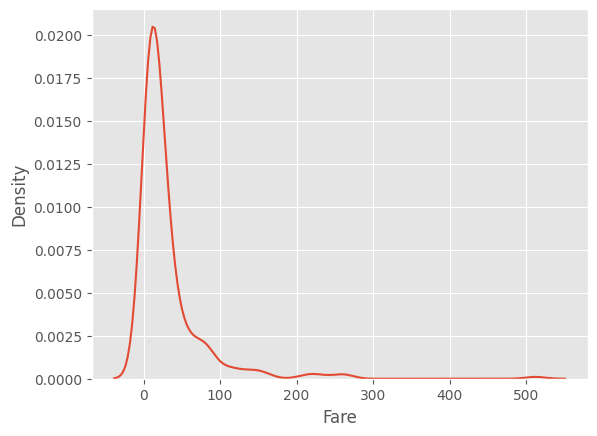

In [27]:
sns.kdeplot(train_df['Fare'])

- Passenger Class & Fare

<BarContainer object of 3 artists>

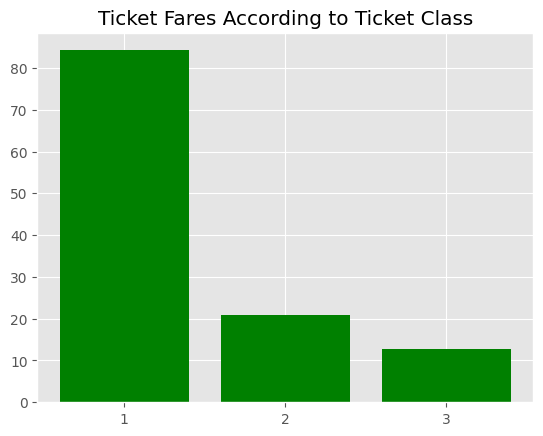

In [28]:
train_df['Pclass'] = train_df['Pclass'].astype('string')
fare_to_class = train_df.groupby('Pclass')['Fare'].mean().reset_index()
plt.title('Ticket Fares According to Ticket Class')
plt.bar(fare_to_class['Pclass'], fare_to_class['Fare'], color = 'green')

In [29]:
train_df['Pclass'] = train_df['Pclass'].astype('int')

After convert Passenger class to string in order to use in bar graph, we must convert it to integer so as to use in machine learning algorithms.

- Survived & Gender

<BarContainer object of 2 artists>

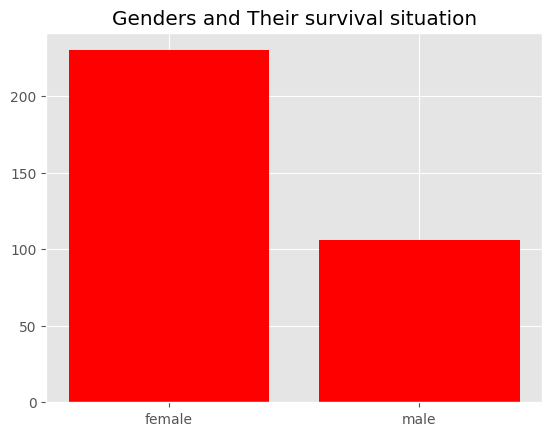

In [30]:
gender_and_survived = train_df.groupby('Sex')['Survived'].sum().reset_index()
plt.title('Genders and Their survival situation')
plt.bar(gender_and_survived['Sex'], gender_and_survived['Survived'], color = 'red')

- Ages & Survival

<BarContainer object of 2 artists>

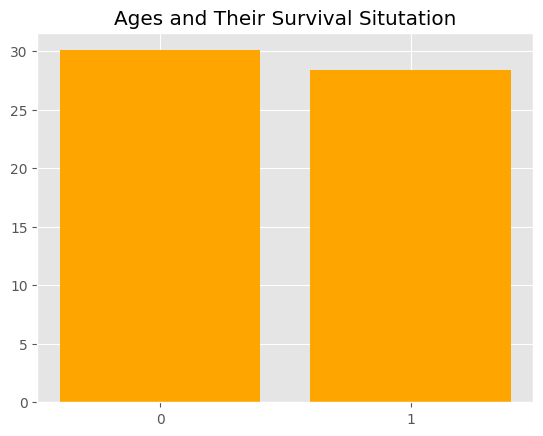

In [32]:
train_df['Survived'] = train_df['Survived'].astype('string')
ages_and_survival = train_df.groupby('Survived')['Age'].mean().reset_index()
plt.title('Ages and Their Survival Situtation')
plt.bar(ages_and_survival['Survived'], ages_and_survival['Age'], color = 'orange')

Passengers' age average who survived is lower than passengers who died. Consequently we can think that children have priority to save.

In [33]:
train_df['Survived'] = train_df['Survived'].astype('int')

As I did before, I convert data type to use in groupby method.

# Data Preprocessing

In [34]:
from sklearn.preprocessing import LabelEncoder

Now we convert all data types which we use in machine learning algorithm to numerical value.

In [35]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 875 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  875 non-null    int64  
 1   Pclass    875 non-null    int64  
 2   Sex       875 non-null    object 
 3   Age       875 non-null    float64
 4   SibSp     875 non-null    int64  
 5   Parch     875 non-null    int64  
 6   Ticket    875 non-null    object 
 7   Fare      875 non-null    float64
 8   Embarked  875 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 68.4+ KB


In [36]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 26.2+ KB


In [37]:
le = LabelEncoder()

for i in train_df.columns:
  if train_df[i].dtype == 'object':
    train_df[i] = le.fit_transform(train_df[i])

for i in test_df.columns:
  if test_df[i].dtype == 'object':
    test_df[i] = le.fit_transform(test_df[i])

# Model Selection (Machine Learning)

We are looking for if that person died or survived. Thus it is a classification problem, not regression. Then we include necessary libraries

In [39]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as XGBClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [54]:
x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
x_test = test_df.iloc[:,:]
y_test = y_test_df.iloc[:,:]

In [55]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       266
           1       0.92      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



In [56]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       266
           1       0.81      0.84      0.82       152

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



Logistic Regression model seems better model

# Submission File

In [60]:
preds = lr.predict(x_test)
predicted_labels = (preds > 0.5).astype(int)
submission = pd.DataFrame({
    'PassengerId': range(892, 1310),
    'Survived': predicted_labels.flatten()
})

submission.to_csv('submission.csv', index=False)